# 目標

エノン写像を分析して多変数における離散力学系になれる．


# エノン写像

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**エノン写像**

</div>
<div>

以下のような $\mathbb{R}^2$ 上の関数 $\boldsymbol{f}$ をエノン写像という．

$$
\boldsymbol{f}(x, y) = (a - x^2 + by, x)
$$

</div>
</div>

$a = 1.28$， $b = -0.3$ で初期値が $(0, 0)$ の場合と $a = 1.2$， $b = -0.3$ で初期値が $(0, 0)$ の場合をシミュレーションするコードを以下に示す．


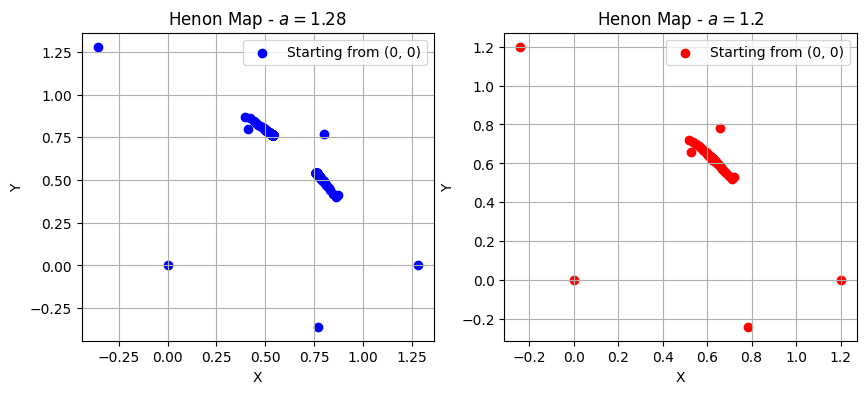

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from model.henon_map import HenonMap

m1 = HenonMap(1.28, -0.3)
m2 = HenonMap(1.2, -0.3)

x_1_init, y_1_init = 0, 0
x_2_init, y_2_init = 0, 0

steps = 500

XY_1: np.ndarray = m1.simulate(x_1_init, y_1_init, steps)
XY_2: np.ndarray = m2.simulate(x_2_init, y_2_init, steps)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(XY_1[:, 0], XY_1[:, 1], color="b", label="Starting from (0, 0)")
axs[0].set_title("Henon Map - $a = 1.28$")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(XY_2[:, 0], XY_2[:, 1], color="r", label="Starting from (0, 0)")
axs[1].set_title("Henon Map - $a = 1.2$")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].legend()
axs[1].grid(True)

plt.show()

## 周期軌道

$a = 1.28$ と $a = 1.2$ の場合とで挙動が異なることが確認できる(**分岐**)．
$a = 1.28$ の場合は $(0.7618, 0.5382), (0.5382,0.7618)$ 付近の 2 周期軌道，
$a = 1.2$ の場合は $(0.62377, 0.62377)$ 付近の不動点に収束しこれは[**沈点**](../fixed_point.ipynb)である．
($\mathbb{R}^{m}$ 上の写像における源点，沈点の定義は [`fixed_point.ipynb`](../fixed_point.ipynb) を参考)

実際に $a = 1.28$ および $a = 1.2$ における不動点でのヤコビ行列とその固有値を計算し $a = 1.28$ における
不動点が沈点でないかどうか， $a = 1.2$ における不動点が沈点であることを確認する．


In [3]:
import numpy as np
from model.henon_map import HenonMap

m1 = HenonMap(1.28, -0.3)
m2 = HenonMap(1.2, -0.3)

print("jacob matrix of a = 1.28, b = -0.3")
print(m1.jacob(m1.fixed_points()[0][0], m1.fixed_points()[0][1]))
print(
    "eigenvalue is ",
    np.linalg.eig(
        m1.jacob(m1.fixed_points()[0][0], m1.fixed_points()[0][1])
    ).eigenvalues,
    "\n",
)
print("jacob matrix of a = 1.2, b = -0.3")
print(m2.jacob(m2.fixed_points()[0][0], m2.fixed_points()[0][1]))
print(
    "eigenvalue is ",
    np.linalg.eig(
        m2.jacob(m2.fixed_points()[0][0], m2.fixed_points()[0][1])
    ).eigenvalues,
)

jacob matrix of a = 1.28, b = -0.3
[[-1.30959767 -0.3       ]
 [ 1.          0.        ]]
eigenvalue is  [-1.01363238 -0.29596529]
jacob matrix of a = 1.2, b = -0.3
[[-1.24754784 -0.3       ]
 [ 1.          0.        ]]
eigenvalue is  [-0.92225994 -0.3252879 ]


## 周期軌道

沈点，源点などの 1 周期軌道に限らず， $n$ 周期軌道においても $\boldsymbol{f}^n$ の沈点か源点かで吸引的周期軌道かどうかが定義できる．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (沈点，吸引的周期軌道)

</div>
<div>

$(0.7618, 0.5382), (0.5382,0.7618)$ は $a=1.28, b=-0.3$ におけるエノン写像の 2 周期軌道であり，これは $f^2$ における吸引的不動点より吸引的 2 周期軌道である．

</div>
</div>

これも $a = 1.28$ におけるエノン写像の 2 回適用における不動点 $(0.7618, 0.5382), (0.5382,0.7618)$ における
ヤコビ行列を計算し， エノン写像の 2 回適用における沈点であることを確認する．

その際に以下の関係を利用する．

$$
\displaystyle{
    \boldsymbol{Df}^{2}(\boldsymbol{x}) = \boldsymbol{Df}(\boldsymbol{f}(\boldsymbol{x}))\cdot\boldsymbol{Df}(\boldsymbol{x})
}
$$


In [7]:
import numpy as np
from model.henon_map import HenonMap

m = HenonMap(1.28, -0.3)

x, y = 0.7618, 0.5382
fx, fy = m.model(0.7618, 0.5382)

print("jacob matrix of a = 1.28, b = -0.3")
print(m.jacob(fx, fy) @ m.jacob(x, y))
print("eigenvalue is ", np.linalg.eig(m.jacob(fx, fy) @ m.jacob(x, y)).eigenvalues)

jacob matrix of a = 1.28, b = -0.3
[[ 1.34000536  0.32292046]
 [-1.5236     -0.3       ]]
eigenvalue is  [0.94474117 0.09526419]


## 吸引領域

$a = 1.28$ の場合において，上の $(0.7618, 0.5382), (0.5382,0.7618)$ に収束する
初期値の集合を $[-2.5, 2.5]\times[-2.5, 2.5]$ の範囲で求める．


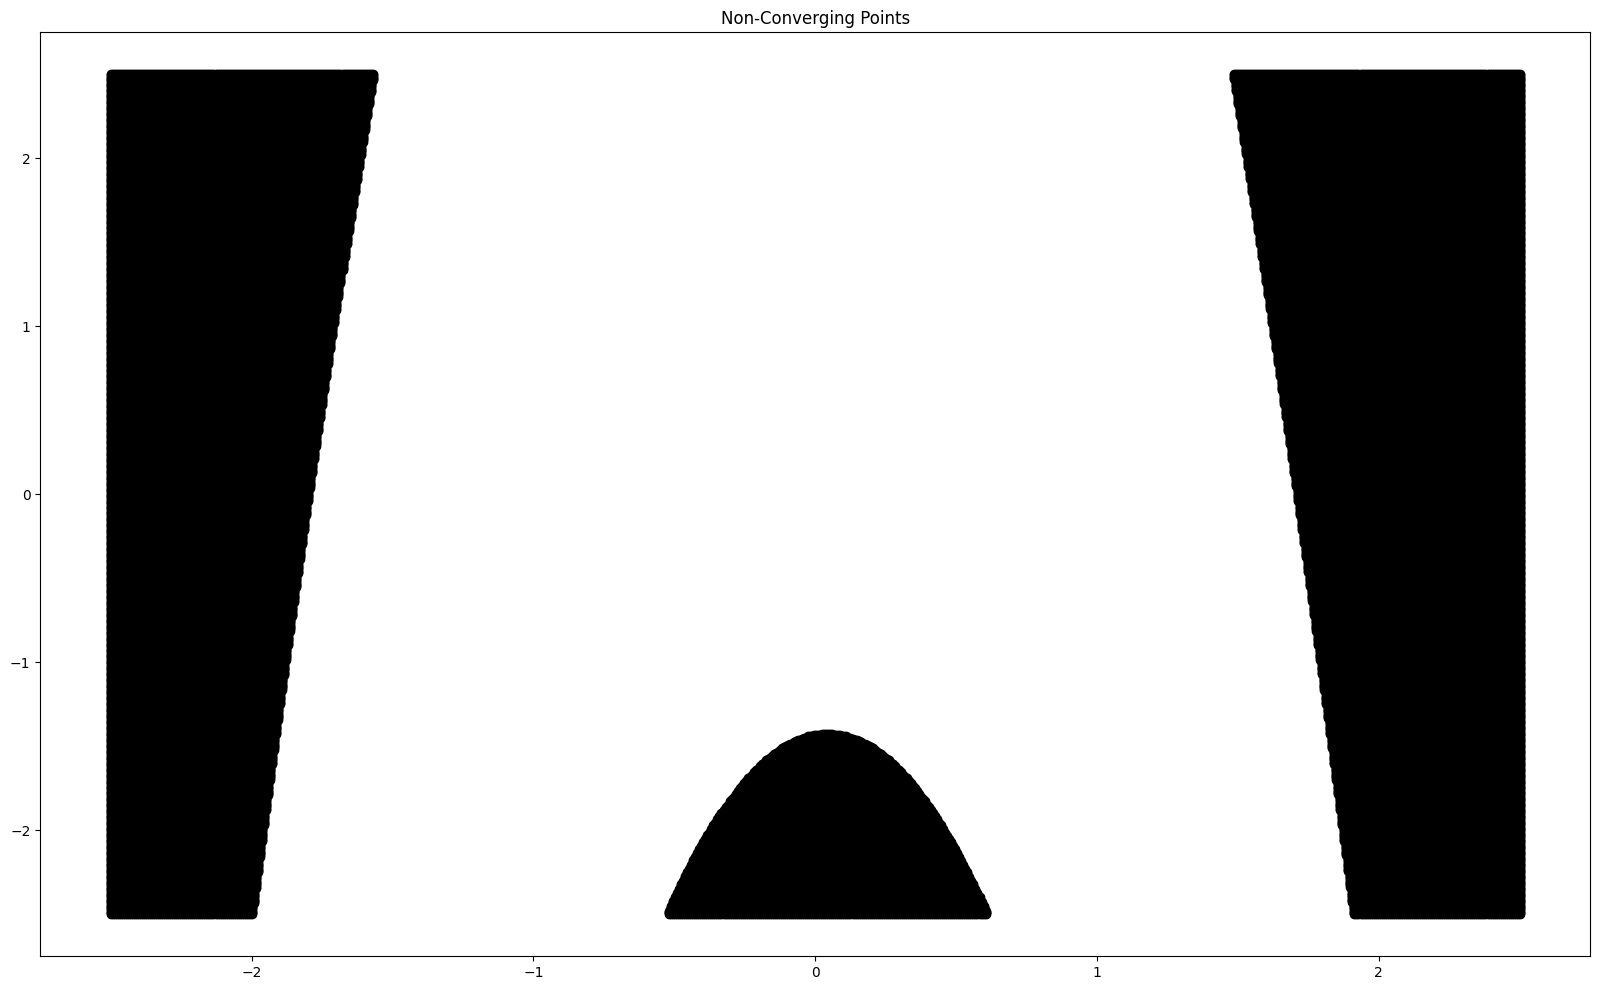

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from model.henon_map import HenonMap

warnings.simplefilter("ignore")


def is_converge(xy: np.ndarray, orbit: np.ndarray, eps: float = 1e-3):
    """
    `orbit` は n 周期軌道を想定
    """
    n = len(orbit)

    if len(xy) < 1:
        return False

    for i in range(n):
        if np.all(np.abs(xy[-1] - orbit[i]) <= eps):
            return True
    return False


m = HenonMap(1.28, -0.3)


def f2(x, y):
    fx, fy = m.model(x, y)
    return m.model(fx, fy)


orbit = np.array([[0.7618, 0.5382], [0.5382, 0.7618]])

x_range = np.linspace(-2.5, 2.5, 700)
y_range = np.linspace(-2.5, 2.5, 700)
x_inits, y_inits = np.meshgrid(x_range, y_range)
x_inits = x_inits.flatten()
y_inits = y_inits.flatten()

steps = 600

not_converge_points: np.ndarray = np.empty((0, 2))

for i in range(len(x_inits)):
    x, y = x_inits[i], y_inits[i]
    XY: np.ndarray = np.array([[x, y]])

    for j in range(steps):
        x, y = f2(x, y)
        if np.isinf(x) or np.isinf(y) or np.isnan(x) or np.isnan(y):
            # 無限大やNaNが検出された場合、その時点で計算を中止する
            break
        XY = np.vstack([XY, [x, y]])

    if not (is_converge(XY, orbit)):
        not_converge_points = np.vstack([not_converge_points, [x_inits[i], y_inits[i]]])


plt.figure(figsize=(20, 12))
plt.scatter(
    not_converge_points[:, 0],
    not_converge_points[:, 1],
    color="black",
    label="Non-Convergin Point",
)
plt.title("Non-Converging Points")
plt.show()

<a id="footnote1">1</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門 (Chaos: Introduction to Dynamical Systems)』, シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].

<a id="footnote2">2</a>: Morris W. Hirsch, Stephen Smale, Robert L. Devaney 著, 桐木紳ほか訳 『力学系入門 : 微分方程式からカオスまで』, 共立出版, 東京, Japan, 2017.1, ISBN: 9784320111363 [4320111362].
